# Big Apple Airbnb Pricer
#### Group 17 (Secret Decoder): Tze-Ning Chang, Pei-Ju Lai, Ping-Yi Sung, Junrong Liu, Ho-Liang Chiang

## Introduction

The Big Apple Airbnb Pricer is a project based on studying the industry of Airbnb accommodation particularly in New York City. From a basic operation framework point of view, Airbnb actually serves two sides of users -- the hosts and the tourists in New York. For both sides of users, the price of an Airbnb listing has always been an important transaction factor. For hosts, they need to know how to price their properties properly; for the tourists, they need to know how to choose a listing with a more reasonable price based on their own needs.
Therefore, to know better about impactful factors for listing price in New York, we acquired the New York Airbnb dataset in 2019 from Kaggle which includes data for basic listing information: listing id, listing name, host id, host name, and various listing properties that can be linked to the users' needs: neighbourhood group, neighbourhood, latitude, longitude, room type, minimum nights, number of reviews, last review, reviews per month, calculated host listings count, availability 365 and price.

Before analyzing this dataset, we first observe and clean the dataset with some basic description, null-value dropping and data-type conversion. After the preprocess of the dataset, we start diving into analyzing factors which could influence price of listings. For example, we would like to figure out the impact of availability of the listings which indicates the stability of the accommodation provided, the words used in the listing names which could directly affect the users feeling about the listing and tendency to click into it or not, and most importantly, the location of the listings which indicate the safety and convenience where the listing located in, and asked some questions:

- Do airbnb prices vary with different locations? 
- How many room types are there in New York City and how do they distributed? 
- What is the availability of airbnb listings like in New York City?
- What is the most influential numerical factor affecting the price?
- What are the popular words used in listing names? Is there any difference for the high-priced listings?
Aside from these analysis, we also expect to build a regression model that can help both sides of users make price-related decisions.

### Heavier Grading on Data Analysis
In this project, we focus more on Data Analysis than on Data Processing for several reasons. First, the data set which we acquired from Kaggle.com was already neat to a certain degree compared to many messy data sets that are publically available. There was not a significant room for improvement for us to perfrom many impressive, challenging data processing techniques. Second, Airbnb and other lodging brokers have grown extensively over the past decade, threatening the position of hospitality giants like Marriott. Therefore, we believe that we will be able to extract a lot of interesting insights from our data since this is such an innovative, creative business. As a result, we focus on performing various data analysis techniques such as descriptive analysis, interactive map, correlation matrix, regression model, NLP and visualizations in order to come up with story-telling and value-adding data analysis.

## Data Processing

We acquired our data from Kaggle. It contains information about Airbnb listings in the New York City area in 2019. Although the data is relatively clean, we spooted some cleaning targets such as useless columns which might slow down the processing time and occupy computer space. Thus, we deleted columns such as ‘host_name’, ‘last_review’ and ‘id’, since they have nothing to do with the analysis. Next, we dealt with illogical values of the remaining columns by dropping rows that does not make snese in a business point of view. For example, listings with either a price of 0 dollar, 0 day of availability, or no name are considered illogical. On top of that, we imputed null values of the ‘review_per_month’ column by 0, so they become numerical values that are easier for us to perform further analysis. Last but not least, we converted the ‘availability_365’ column into categorical variable by segmenting them into different levels to present an intuitive view of the degree of availability of a listing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests, re
import seaborn as sns
import plotly.graph_objects as go
import nltk
pd.set_option('max_columns', 40)
pd.set_option('colwidth', 300)

In [52]:
import string, itertools
from collections import Counter, defaultdict
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics

In [3]:
nltk.download('punkt') # Used for tokenizing strings
nltk.download('stopwords') # Common no-meaning words
nltk.download('wordnet') # Lexical database Used for finding word meanings, synonyms, antonyms, etc.

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ginnychang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ginnychang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ginnychang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# read the data
airbnb = pd.read_csv("/Users/ginnychang/Downloads/AB_NYC_2019.csv" ,delimiter=',',engine='python', encoding='utf-8')
airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [5]:
#Drop the columns
del airbnb['host_name']
del airbnb['last_review']
del airbnb['id']

In [6]:
# check if there is any missing/Null value in our data
airbnb.isnull().sum(axis=0)

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# Dealing with the Null/Missing data
# Drop the rows with a N/A listing name
airbnb = airbnb[airbnb['name'].notnull()]

#Impute missing value under review_per_month by 0
airbnb['reviews_per_month']= airbnb['reviews_per_month'].fillna(0)

#drop records with a price of $0.
airbnb = airbnb[airbnb['price'] != 0]

#drop 0 value on column availability_365, because it doesnt make sense
airbnb = airbnb[airbnb['availability_365'] != 0]

In [8]:
# Rename "neighbourhood_group" for better undersanding
airbnb.rename(columns={'neighbourhood_group':'region'}, inplace=True)

# Convert "availablity_365" to categorical variable 
bin_labels = ['level 1', 'level 2', 'level 3', 'level 4', 'level 5']
bin = np.array([0., 90., 180., 240.,300., 365.])
airbnb['availability_level'] = pd.cut(airbnb['availability_365'], bin, labels=bin_labels)

## Data Analysis 

### Descriptive price analysis baed on regions, room types and availability
We first pull out the unique categories of regions, room types and availability level by using the unique function. Then we  created a for loop that takes the three categorical variables and return the descriptive statistics table of price for each category that the column contains. The columns of these tables include count, as well as the max, min, mean, median, Q1, Q3 and range of the prices. With these discriptive statistics tables, we acquired an inital understanding for the price distribution in each category and see if there are interesting findings that are different from common expectations.

In [9]:
# Check the categories in region
airbnb.region.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [10]:
# Check the classification of room type
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [11]:
# Check the classification of room type
airbnb.availability_level.unique()

[level 5, level 3, level 2, level 1, level 4]
Categories (5, object): [level 1 < level 2 < level 3 < level 4 < level 5]

In [12]:
#Descriptive analysis of airbnb prices in different regions and room types
list1=["region","room_type", "availability_level"]
description = list()
for variable in list1:
    desc = airbnb.groupby(by=airbnb[variable])['price'].describe()
    desc['range'] = desc['max'] - desc['min']
    description.append(desc)
region_desc = description[0]
roomtype_desc = description[1]
availability_desc = description[2]

In [13]:
region_desc.sort_values(by="mean")

count        mean         std   min   25%    50%    75%  \
region                                                                     
Bronx            912.0   89.060307  112.730436  10.0  45.0   66.0  100.0   
Queens          4298.0  100.029781  108.584467  10.0  50.0   75.0  115.0   
Staten Island    331.0  114.229607  291.526508  13.0  50.0   75.0  107.5   
Brooklyn       12252.0  132.935031  189.044531  10.0  64.0   99.0  150.0   
Manhattan      13557.0  214.189422  325.049461  10.0  99.0  151.0  240.0   

                   max   range  
region                          
Bronx           2500.0  2490.0  
Queens          2600.0  2590.0  
Staten Island   5000.0  4987.0  
Brooklyn        8000.0  7990.0  
Manhattan      10000.0  9990.0

From the region table, we noticed that listings in Bronx have the lowest average price and the smallest price range, while listings in Manhattan are in the other extreme. Also, over 80% of the listings locate in Brooklyn and Manhattan. This table provides useful insights as accommodation seekers can target the regions according to their budget, and hosts can price their listings by referencing information from this table.

In [14]:
roomtype_desc.sort_values(by="mean")

count        mean         std   min    25%    50%    75%  \
room_type                                                                     
Shared room        861.0   66.072009   97.897464  11.0   32.0   43.0   70.0   
Private room     13959.0   93.978150  172.967486  10.0   53.0   70.0   99.0   
Entire home/apt  16530.0  224.604840  297.879696  10.0  123.0  170.0  249.0   

                     max   range  
room_type                         
Shared room       1800.0  1789.0  
Private room      9999.0  9989.0  
Entire home/apt  10000.0  9990.0

The room type table illutrates that shared room is the cheapest of the three types and has the smallest price range, while  entire home or apartment is the most expensive type and has the largest price range. Also, 53% of the listings in our data belongs to the privte room or entire home/apt type. As a result, customers looking for shared rooms in New York should really book their listings as early as possible since the supply is scarce, and hosts can price their listings by classifying his/her own listing's room type and using this table as reference. Lastly, an interesting finding is that the standard deviation for Entire home/apt is very high, which means the list prices for this room type are all over the place, making the selection process for value-seeking customers more difficult.

In [15]:
availability_desc.sort_values(by="mean")

count        mean         std   min   25%    50%    75%  \
availability_level                                                              
level 1             11711.0  142.210230  201.787429  10.0  70.0  100.0  170.0   
level 2              5282.0  161.527641  272.656726  10.0  70.0  110.0  180.0   
level 3              2746.0  166.360889  191.449611  19.0  75.0  125.0  199.0   
level 4              3508.0  175.613740  218.639144  10.0  79.0  129.0  200.0   
level 5              8103.0  183.876836  330.120945  10.0  67.0  117.0  200.0   

                        max   range  
availability_level                   
level 1             10000.0  9990.0  
level 2              7703.0  7693.0  
level 3              3518.0  3499.0  
level 4              8500.0  8490.0  
level 5              9999.0  9989.0

The outcome of this table indicates that the higher the availability, the higher the average list price. This is an interesting pattern as it follows the opposite direction of the standard economic pricing theory - higher price for scarce resources. However, this pattern does make logical sense in the nature of the Aibnb market. Since listings with greater availability may be viewed as safer, more reliable options by accommodation seekers, they should be willing to pay more to compensate the hosts for providing stability.

### Interactive listing price map
In order to better exploring the price distribution of listings among New York City, we have decided to make a interavtive map for visualization. We first converted list prices into a categorical levels which are low, median, median-high and high price. Then we used plotyly to create an interactive map, labeled by the listings' neighborhood, and use different color of markers to distinguish their price level.

In [16]:
airbnb["price"].describe()

count    31350.000000
mean       162.087624
std        254.456493
min         10.000000
25%         70.000000
50%        112.000000
75%        189.000000
max      10000.000000
Name: price, dtype: float64

In [17]:
# create price level from numerical price to categorical
price_labels = ['low','median','median high','high']
prices_bins=[0,70,150,300,10000]
airbnb['price_level'] = pd.cut(airbnb['price'],bins=prices_bins,labels=price_labels)
airbnb['price_level'].value_counts()

median         12633
low             8288
median high     7820
high            2609
Name: price_level, dtype: int64

In [18]:
mapbox_access_token = 'pk.eyJ1IjoiZ2lubnljaGFuZyIsImEiOiJjazloazdhd2owemc5M2Rud241eDUxMG9jIn0.dJS5bOJp6r2dDyhmPnu40g'

In [51]:
# interactive map
high_map_data = go.Scattermapbox(
        lon = airbnb[airbnb["price_level"]=="high"]['longitude'],
        lat = airbnb[airbnb["price_level"]=="high"]['latitude'],
        text = airbnb["neighbourhood"],
        hoverinfo='text',
        mode = 'markers',
        marker = dict(
                    color = '#FF5733',
                    symbol = 'circle',
                    opacity = .5
                ),
        name= "High price listings"
)
medhigh_map_data = go.Scattermapbox(
        lon = airbnb[airbnb["price_level"]=="median high"]['longitude'],
        lat = airbnb[airbnb["price_level"]=="median high"]['latitude'],
        text = airbnb["neighbourhood"],
        hoverinfo='text',
        mode = 'markers',
        marker = dict(
                    color = '#FFA500',
                    symbol = 'circle',
                    opacity = .5
                ),
        name= "Median-high price listings"
)
median_map_data = go.Scattermapbox(
        lon = airbnb[airbnb["price_level"]=="median"]['longitude'],
        lat = airbnb[airbnb["price_level"]=="median"]['latitude'],
        text = airbnb["neighbourhood"],
        hoverinfo='text',
        mode = 'markers',
        marker = dict(
                    color = 'yellow',
                    symbol = 'circle',
                    opacity = .5
                ),
        name= "Median price listings"
)
low_map_data = go.Scattermapbox(
        lon = airbnb[airbnb["price_level"]=="low"]['longitude'],
        lat = airbnb[airbnb["price_level"]=="low"]['latitude'],
        text =airbnb["neighbourhood"],
        hoverinfo='text',
        mode = 'markers',
        marker = dict(
                    color = '#32CD32',
                    symbol = 'circle',
                    opacity = .5
                ),
        name= "Low price listings"
)
listing_map_layout = go.Layout(
        title = 'Listings price Map',
        mapbox=go.layout.Mapbox(
            accesstoken=mapbox_access_token,
            zoom=1
        )
    )

listing_map = go.Figure(data=[low_map_data,median_map_data,medhigh_map_data,high_map_data], layout=listing_map_layout)
listing_map.show()

From the map, we can see a trend that most of the higher price listings are clustering in Manhanttan and Brookyln among all five regions. Moreover, the listings distribution will gradually spread out from these two regions as price decreases. If we zoom in to each of these two regions, we can also observe some detailed findings. In Manhanttan, we can notice that the high price listings are usually clustering below midtown, and most of the low price listings are gathering in uptown over central park. In brookyln, most of the high price listings clustered in neighborhoods that are near the tunnels or bridges that connect to Manhanttan region.
There is an old phrase in the real estate industry: "The top three factors that affect housing prices are : location, location, and location!". While our data has many significant features, location is still, indisputably, one of if not the most significant facor of price.

### Allocation of rooms types in different locations

After knowing the price distrubutions base on different categorical variables, such as regions, room types, and availability, we now interesting to find out whether the allocation of room types is different from locations. We need to first calculate the number of one particular room type in various regions of New York. Of course, only comparing the number can not give us enough insights since regions with different number of listings should be weighted individually. Therefore, making stacked bar chart can help us visualize the percentage distributions of a centain room type among regions, thus making the comparison process more intuitive.

In [21]:
#Allocation of room types in different locations
grouped1 = airbnb.groupby(by=['region','room_type'])
for name, group in grouped1:
    print(name, len(group))

('Bronx', 'Entire home/apt') 318
('Bronx', 'Private room') 545
('Bronx', 'Shared room') 49
('Brooklyn', 'Entire home/apt') 6071
('Brooklyn', 'Private room') 5875
('Brooklyn', 'Shared room') 306
('Manhattan', 'Entire home/apt') 8439
('Manhattan', 'Private room') 4782
('Manhattan', 'Shared room') 336
('Queens', 'Entire home/apt') 1550
('Queens', 'Private room') 2586
('Queens', 'Shared room') 162
('Staten Island', 'Entire home/apt') 152
('Staten Island', 'Private room') 171
('Staten Island', 'Shared room') 8


In [22]:
# visualization data
x = [0,1,2,3,4]
Entire = np.array([318, 6071, 8439, 1550, 152])
Private = np.array([545, 5875, 4782, 2586, 171])
Shared = np.array([49, 306, 336, 162, 8])

snum = Entire+Private+Shared

# normalization
Entire = Entire/snum*100.
Private = Private/snum*100.
Shared = Shared/snum*100.

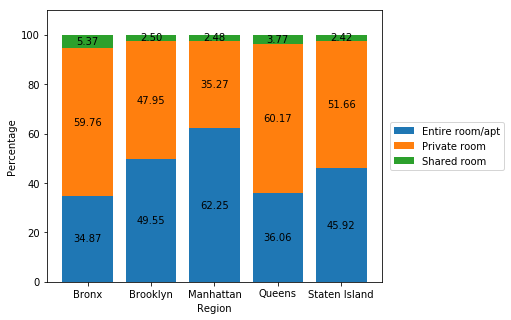

In [23]:
plt.figure(figsize=(6,5))
barWidth = 0.85
names = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
# stack bars
plt.bar(x, Entire, label='Entire room/apt')
plt.bar(x, Private ,bottom=Entire,label='Private room')
plt.bar(x, Shared ,bottom=Entire+Private,label='Shared room')

# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, Entire/2, Entire):
    plt.text(xpos, ypos, "%.2f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, Entire+Private/2, Private):
    plt.text(xpos, ypos, "%.2f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, Entire+Private+Shared/2, Shared):
    plt.text(xpos, ypos, "%.2f"%yval, ha="center", va="center")

plt.ylim(0,110)
plt.xticks(x, names)
plt.xlabel("Region")
plt.ylabel("Percentage")

plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
plt.show()

According to the stacked bar charts, Manhattan has the highest proportion of entire home/apartment listings among the five, with a percentage of 62.25%; Queens has the highest percentage of private room listings of 60.17% in the entire city; There are not many shared room listings in New York City, but Bronx has the highest percentage of shared room listings among five regions. These visualization provides valuable insights; for customers putting room type as the priority of selecting accommodations, they can target the regions with more of their desired room types to broaden their choices. For hosts providing listings of a scarce room type in a particular region, he/she can strtegically price the listings relatively higher, since potential customers do not have many substitutes within the region, hosts have a higher bargaining power.

### Find the popular words used in listing names

Besides the analysis above, we are also curious about whether there is any trend in naming the listing, and whether those trends might be related to the price. So, we decide to find the popular words used in listing names. First, we combined all of the listing names and splitted all the words in the list. Then, we could get a list of all split words of all the listing names. Later, utilizing the Counter module, we efficiently counted the frequencies of each unique word in the list and translate the results into a dictionary to pass into a Pandas Series and ultimately visualize the results.

To figure out the words mostly used in more expensive listings, we will have to find out the high-priced listings (also, we could set a standard for it) and repeat the same manipulations. We can also define a function to find the most frequently used words so that we could apply the function repeatedly to further understand the relationships between the words used and other variables.

### All Listings

In [25]:
# All words in all listings

def standardize_report(nid, report='name'):
    
    # Extract name from airbnb data frame
    s = airbnb.at[nid, report]
    
    # Convert text to lower case
    s = s.lower()
    
    # Remove unnecessary punctuation
    s = re.sub('[,()!;12&-]', '', s)
    
    # Regular expression tokenization - Method 1
    words = regexp_tokenize(s, '[^. ]+')
    
    # Filter stop words from tokenized words
    words = [word for word in words if word not in stopwords.words('english')]
    
    # Lemmatizataion
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(word) for word in words]
    
    return words

In [26]:
# Process all the listing names and assemble into corpus
names = []
for i in airbnb.index:
    if type(airbnb.at[i, 'name']) == str:
        names.append(standardize_report(i))

In [27]:
# Define dictionary of names
D = Dictionary(names) # from gensim.corpora.dictionary

# Create corpus
corpus = [D.doc2bow(report) for report in names]

In [28]:
# Determine total word counts across the entire corpus

all_word_counts = {}
for word_id, word_count in itertools.chain.from_iterable(corpus):
    if word_id in all_word_counts:
        all_word_counts[word_id] += word_count
    else:
        all_word_counts[word_id] = 1

# Create a sorted list from the dictionary: sorted_word_count
word_counts = sorted(all_word_counts.items(), key=lambda item: item[1], reverse=True) 

# Print the top 10 words across all documents alongside the count
for word_id, word_count in word_counts[:10]:
    print(D.get(word_id), word_count) # D represents the dictionary of listing names

room 6269
bedroom 4875
private 4695
apartment 3818
cozy 3068
apt 2706
brooklyn 2457
studio 2426
manhattan 2423
br 2150


In [29]:
# Assemble all words with frequencies for Word Cloud
all_words = []
for word_id, word_count in word_counts:
    all_words.extend([D.get(word_id)] * word_count) # extend the list by a word a specific number of times (word_count)

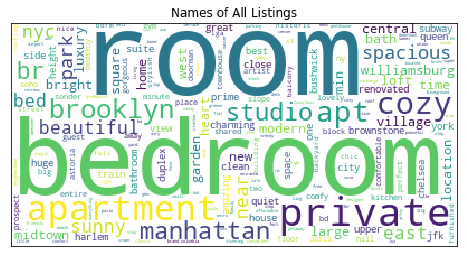

In [30]:
# Word Cloud
wc = WordCloud(background_color='white', collocations=False).generate(' '.join(all_words))
plt.figure(figsize=(8,8))
plt.xticks([])
plt.yticks([])
plt.imshow(wc)
plt.title('Names of All Listings');

For all listings, if we consider all of the words excluding stopwords, "room" and "beroom" were the most frequently used words. However, these findings only provide limited value and are not the main words we are interested in. Instead, we are more interested in finding the frequently used adjectives that describes the characteristics of the listings. Therefore, in our next step, we treated these words as stopwords so they would be excluded from our word lists.

#### Remove Common Room Types Words

In [31]:
# Remove Room Types in All listings

def standardize_report_no_roomtype(nid, report='name'):
    
    # Extract name from airbnb data frame
    s = airbnb.at[nid, report]
    
    # Convert text to lower case
    s = s.lower()
    
    # Remove unnecessary punctuation
    s = re.sub('[,()!;12&-]', '', s)
    
    # Regular expression tokenization - Method 1
    words = regexp_tokenize(s, '[^. ]+')
    
    # Filter stop words from tokenized words
    words = [word for word in words if word not in stopwords.words('english') and word not in ["room", "bed", "bedroom", "apartment","apt","br"]]
    
    # Lemmatizataion
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(word) for word in words]
    
    return words

In [32]:
names = []
for i in airbnb.index:
    if type(airbnb.at[i, 'name']) == str:
        names.append(standardize_report_no_roomtype(i))

In [33]:
# Define dictionary of listing names
D = Dictionary(names) # from gensim.corpora.dictionary

# Create corpus
corpus = [D.doc2bow(report) for report in names]

In [34]:
# Determine total word counts across the entire corpus

all_word_counts = {}
for word_id, word_count in itertools.chain.from_iterable(corpus):
    if word_id in all_word_counts:
        all_word_counts[word_id] += word_count
    else:
        all_word_counts[word_id] = 1

# Create a sorted list from the dictionary: sorted_word_count
word_counts = sorted(all_word_counts.items(), key=lambda item: item[1], reverse=True) 

# Print the top 10 words across all documents alongside the count
for word_id, word_count in word_counts[:10]:
    print(D.get(word_id), word_count) 

private 4695
cozy 3068
brooklyn 2457
studio 2426
manhattan 2423
spacious 1988
park 1883
near 1650
east 1630
beautiful 1551


In [35]:
# Assemble all words with frequencies for Word Cloud
all_words = []
for word_id, word_count in word_counts:
    all_words.extend([D.get(word_id)] * word_count) # extend the list by a word a specific number of times (word_count)

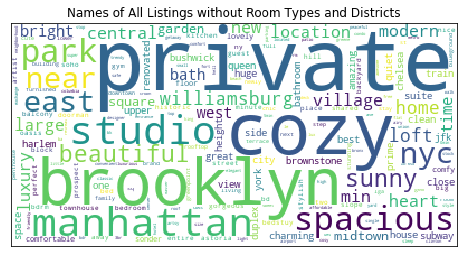

In [36]:
# Word Cloud: Words without Room Types and Districts in All Listings 
wc = WordCloud(background_color='white', collocations=False).generate(' '.join(all_words))
plt.figure(figsize=(8,8))
plt.xticks([])
plt.yticks([])
plt.imshow(wc)
plt.title('Names of All Listings without Room Types and Districts');

After removing stopwords and words like "bedroom" that do not provide descriptive values, the word cloud above shows that, as expected, words like "private","cozy","spacious" and "beautiful" frequently appear in the listing names, which were used to attract customers and make them feel secured, relaxed, and tempted to book. 

Besides, one interesting observation is that it also shows some district information. For example, "brooklyn" aand "manhattan" appear more frequently which corresponds to their high amount of listings in our dataset.

Lastly, this NLP processing work can really add value in the scenario of training new hosts. Airbnb can add this list of words in its existing "How to start hosting" webpage, so new hosts will learn to integrate these words with their current naming strtegies. If the new hosts can attract more customers through naming, their revenue will increase, and so does Airbnb.

In [37]:
airbnb['region'].value_counts()

Manhattan        13557
Brooklyn         12252
Queens            4298
Bronx              912
Staten Island      331
Name: region, dtype: int64

### Top 10% High Priced Listings
After analyzing the whole dataset, we were curious about whether the high priced listings are named differently? If yes, how? Therefore, we further look into the frequently used words for the 10% highest priced listings.

In [38]:
pd.qcut(airbnb['price'],10).value_counts().sort_index(ascending=False)

(295.2, 10000.0]    3135
(200.0, 295.2]      3033
(169.0, 200.0]      3156
(139.0, 169.0]      3180
(112.0, 139.0]      3144
(95.0, 112.0]       2886
(77.0, 95.0]        3400
(63.0, 77.0]        3080
(50.0, 63.0]        2403
(9.999, 50.0]       3933
Name: price, dtype: int64

In [59]:
airbnb_high_price = airbnb[airbnb['price'] >= 295]

In [40]:
# All words without room types in top 10% high price listings

def standardize_report_no_roomtype(nid, report='name'):
    
    # Extract name from airbnb data frame
    s = airbnb_high_price.at[nid, report]
    
    # Convert text to lower case
    s = s.lower()
    
    # Remove unnecessary punctuation
    s = re.sub('[,()!;123&-/+]', '', s)
    
    # Regular expression tokenization 
    words = regexp_tokenize(s, '[^. ]+')
    
    # Filter stop words from tokenized words
    words = [word for word in words if word not in stopwords.words('english') and word not in ["room", "bed", "bedroom", "apartment","apt","studio","br"]]
    
    # Lemmatizataion
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(word) for word in words]
    
    return words

In [41]:
# Process listing names and assemble into corpus
names_high_price = []
for i in airbnb_high_price.index:
    if type(airbnb_high_price.at[i, 'name']) == str:
        names_high_price.append(standardize_report_no_roomtype(i))

In [42]:
# Define dictionary of listing names
D = Dictionary(names_high_price) 

# Create corpus
corpus = [D.doc2bow(report) for report in names_high_price]

In [43]:
# Determine total word counts across the entire corpus

all_word_counts = {}
for word_id, word_count in itertools.chain.from_iterable(corpus):
    if word_id in all_word_counts:
        all_word_counts[word_id] += word_count
    else:
        all_word_counts[word_id] = 1

# Create a sorted list from the dictionary: sorted_word_count
word_counts = sorted(all_word_counts.items(), key=lambda item: item[1], reverse=True) 

# Print the top 10 words across all documents alongside the count
for word_id, word_count in word_counts[:10]:
    print(D.get(word_id), word_count) 

luxury 313
loft 298
park 255
w 238
manhattan 217
bath 206
central 205
nyc 203
village 202
private 184


In [44]:
# Assemble all words with frequencies for Word Cloud
all_words = []
for word_id, word_count in word_counts:
    all_words.extend([D.get(word_id)] * word_count) # extend the list by a word a specific number of times (word_count)

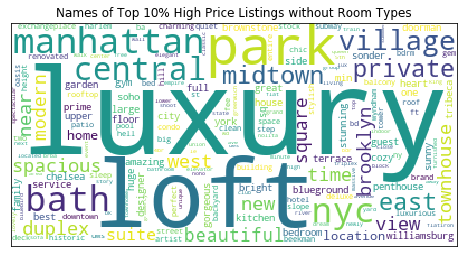

In [45]:
# Word Cloud: Top 10% High Price Listing_ All words without room types
wc = WordCloud(background_color='white', collocations=False).generate(' '.join(all_words))
plt.figure(figsize=(8,8))
plt.xticks([])
plt.yticks([])
plt.imshow(wc)
plt.title('Names of Top 10% High Price Listings without Room Types');

From the word cloud above, we can see that the words "loft", "luxuary", "village", "park", "manhattan", "spacious", "midtown", "bath", "central" are all frequently used words, which are kind of different from the overall words used and more specific for the high price listing.
Besides, the location information here might also be some interesting things that we could discuss. For example, Are most of the high price listings in the manhattan region? Are there more listings within villages? Although the words used in naming doesn't exactly express the whole accurate details about the listings, they sometimes could still reflect some patterns.

In [47]:
airbnb_high_price["region"].value_counts()

Manhattan        2297
Brooklyn          752
Queens            126
Bronx              27
Staten Island      11
Name: region, dtype: int64

In [48]:
airbnb_high_price[airbnb_high_price['region']=="Manhattan"]["neighbourhood"].value_counts()

Midtown                376
Hell's Kitchen         257
Upper West Side        197
Chelsea                170
East Village           143
Upper East Side        130
West Village           117
Financial District     108
Harlem                  93
Murray Hill             77
SoHo                    75
Lower East Side         72
Tribeca                 69
Theater District        67
Greenwich Village       53
Kips Bay                53
East Harlem             46
Gramercy                34
Nolita                  33
Chinatown               31
Flatiron District       25
NoHo                    24
Washington Heights      14
Battery Park City        7
Civic Center             7
Little Italy             6
Inwood                   5
Morningside Heights      4
Two Bridges              3
Roosevelt Island         1
Name: neighbourhood, dtype: int64

### Exploring the most influential factor that affects price
Before we really dive into the relationship between all of the variables correlated to price(including three major categorical variables), we decide to use a correlation table to study the relationship between the numeric variables and price.

In [58]:
#What is the most influential factor that affects price?
airbnb.iloc[:,2:].corr()["price"]

latitude                          0.033756
longitude                        -0.158819
price                             1.000000
minimum_nights                    0.039316
number_of_reviews                -0.072887
reviews_per_month                -0.082579
calculated_host_listings_count    0.060815
availability_365                  0.074493
Brooklyn                         -0.091766
Manhattan                         0.178732
Queens                           -0.097213
Staten Island                    -0.019429
Private room                     -0.239809
Shared room                      -0.063411
level 2                          -0.000991
level 3                           0.005203
level 4                           0.018869
level 5                           0.050556
Name: price, dtype: float64

According to the correlation table, the most influential numeric factor that affects price, surprisingly, is longitude, with a correlation coefficient of -0.158819. It aligns with the fact that listings located in the west of New York City are more expensive than those in the east, so this variable indicating a listing's horizontal position has the strongest correlation among the numeric variables. However, all of these numeric variables do not share a significant relationship with the price. We need to find out later if those categorical variables being left out here are more statistically significant to our target variable, price.

### Build a Linear Regression Model Based on the Dataset

After getting the correlation between numerical variables with price, we then develop a regression model to see wheter the result will change after we consider all the variables in our data. Moreover, building a linear regression model can be helpful for predicting the airbnb price based on different situationwe. 

For the regression model, we first need to create dummy variables from three categorical columns -- 'region', 'room_type' and 'availability_level'. We omitted the column 'neighbourhood' because neighborhoods are so close to one another, and they are just tiny subparts of the five major regions, so we believe that this column can be negligible. 

'number_of_reviews' is also neglected in this regression model. One of the reasons is that it provides duplicate information as the 'reviews_per_month' column. Additionally, compared to 'review_per_month', which is a metric normalized with an equal time unit (per month), 'number_of_reviews' is just the unnormalized version of 'review_per_month' that is biased because older listings will have more reviews.

In [49]:
#Turn 'region' and 'room_type' into dummy variables
airbnb[['Brooklyn', 'Manhattan', 'Queens', 'Staten Island']] = pd.get_dummies(airbnb['region'], drop_first = True)
airbnb[['Private room', 'Shared room']] = pd.get_dummies(airbnb['room_type'], drop_first = True)
airbnb[['level 2', 'level 3', 'level 4', 'level 5']] = pd.get_dummies(airbnb['availability_level'], drop_first = True)

In [53]:
# Split the original dataset into training set and testing set (75% for training set, 25% for testing set).
airbnb_var = ['latitude', 'longitude', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'Brooklyn', \
              'Manhattan', 'Queens', 'Staten Island', 'Private room', 'Shared room', 'level 2', 'level 3', 'level 4', 'level 5']
X_train, X_test, y_train, y_test = train_test_split(airbnb[airbnb_var], airbnb['price'], random_state=123)

In [54]:
#Train the model
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

print('Coefficients of the Regression\n')
for i, name in enumerate(airbnb_var): 
    print(f'{name:>30}: {linear_regression.coef_[i]}')  
print()    
print('intercept:', linear_regression.intercept_)

Coefficients of the Regression

                      latitude: -268.27934910533116
                     longitude: -445.71564592113583
                minimum_nights: -0.14072240532328129
             reviews_per_month: -7.407631381469677
calculated_host_listings_count: -0.1770866852761289
                      Brooklyn: -43.19619719780413
                     Manhattan: 34.64716315075727
                        Queens: -9.00174452121942
                 Staten Island: -142.4221255152344
                  Private room: -112.54178126325853
                   Shared room: -154.42336740598276
                       level 2: 22.283637730724067
                       level 3: 10.761112287816557
                       level 4: 20.094501668040376
                       level 5: 44.46795487255597

intercept: -21818.05188780264


The estimated regression equation for the model that we train is:

\begin{equation}
price=-254.72 latitude-455.42 longitude-0.15 minimum\_nights-7.41 review\_per\_month-0.18 calculated\_host\_listings\_count-43.20 region\_brooklyn+34.65 region\_manhattan-9.00 region\_queens-142.42 region\_staten\_island-112.54 room\_type\_private\_room-154.42 room\_type\_shared\_room+22.28 availability\_level\_2+10.76 availability\_level\_3+20.09 availability\_level\_4+44.47 availability\_level\_5
\end{equation}


Without testing the model, we can still check those coefficients to see if they meet our expectations. The linear regression result shows us coefficients of each variable we fit into the model, which can tell us the possible relationship between the dependent variable price and each independent variable.

#### For continuous variables:
* Latitude and longitude: On average, the price of airbnb would get cheaper as you go more north or more east in New York city.
* Minimum nights: On average, the more relax the minimum night requirement is, the higher the price would be. Generally, If the minimum night requirement of an airbnb listing increases by 1 night, the price of that airbnb listing will decrease by about 0.14 dollars, holding other variable constant.
* Reviews per month: On average, the more reviews an airbnb listing receive per month, the lower the price tends to get. Generally, if an airbnb listing receive one more review per month, the price of the listing would decrease by about 7.4 dollars, holding other variable constant.
* Caculated host listing count: On average, the more airbnb listings the host of a listing owns, the lower the price of that listing. Generally, if the host of a listing owns one more listing on Airbnb, the price of that listing would decrease by 0.18 dollars, holding other variable constant.

Overall, the coefficients of latitude, longitude as well as minimum night requirement meet our expectations.

#### For categorical variables:
###### Region:  
Coefficients in an ascending order (Bronx as the base): Staten Island < Brooklyn < Queens < Manhattan

On average, holding other variables constant, the price of a listing in Staten Island would be 142.42 dollars lower than that of one in Bronx; the price of a listing in Brooklyn would be 43.20 dollars lower than that of one in Bronx; the price of a listing in Queens would be 9 dollars lower than that of one in Bronx; the price of a listing in Manhattan would be 34.65 dollars higher than that of one in Bronx.

In general, a listing located in Manhattan tends to be more expensive than listings in the same condition that are located in other regions. The result here meets our expectation since Manhattan should be the place with more valuable and scarce living spaces.

###### Room Type:
Coefficients in an ascending order (Entire home/apt as the base): Shared Room < Private Room

On average, holding other variables constant, the price of a shared room would be 154.42 dollars lower than that of an entire home/apartment; the price of a private room would be 112.54 dollars lower than that of an entire home/apartment.

In general, among the three room types that are available on Airbnb, entire home/apartment is the most expensive type, holding other variables constant. The coefficients here meet our expectation because there is so much more space in entire home/apartment than in any other type of listings. Therefore, the total listing price should be higher.

###### Availability level:
Coefficients in an ascending order (Level 1 as the base): level 3 < level 4 < level 2 < level 5

As the availability level increase, the time when a listing is available for booking in a year will be longer.
On average, holding other variables constant, the price of a listing with a level 3 availability would be 10.76 dollars higher than that of a listing with a level 1 availability; the price of a listing with a level 4 availability would be 20.09 dollars higher than that of a listing with a level 1 availability; the price of a listing with a level 2 availability would be 22.28 dollars higher than that of a listing with a level 1 availability; the price of a listing with a level 5 availability would be 44.47 dollars higher than that of a listing with a level 1 availability.

In general, holding other variable constant, the price of a listing with a level 5 availability (which is available for booking for 300 - 365 days in a year) would be higher than that of a listing with any other level of availability. The coefficients here are actually out of our expectation because we used to think that higher level of availability means the listing is less scarce on Airbnb, hence the price would be lower.


In [55]:
#Test the model
expected_prices = y_test
predicted_prices = linear_regression.predict(X_test)

In [56]:
predicted_vs_expected = pd.DataFrame()
predicted_vs_expected['Expected Prices'] = expected_prices
predicted_vs_expected['Predicted Prices'] = predicted_prices
predicted_vs_expected

Expected Prices  Predicted Prices
30468              250        303.970134
9122               120        283.804429
15169              369        274.278857
43892               34        112.325155
32915              115        180.617905
...                ...               ...
20692               58         67.857136
39860               32         47.294804
5206               110         98.818053
670                199        161.138390
40086             1750        226.353758

[7838 rows x 2 columns]

In [57]:
metrics.r2_score(expected_prices, predicted_prices)

0.08050202842499699

An approximate r2 score value of 0.081 means that the regression model we construct does not have a very good ability of predicting the price of an Airbnb listing based on the information provided by the original dataset. 

The most important reason behind low accuracy of prediction is the lack of other information/variables that can explain variation in the listing price more significantly. For example, the total rating and the percentage of good reviews of a listing could contribute to a higher listing price; the monthly rent the host needs to pay for the property can to some degree influence the price of the listing; the age of the building can also influence the quality of the property, thus might influence the price; the amenities provided in the property (which is also a reflection of the needs of tourists in New York) can also be an important factor to the price, etc.. These factors listed are not included in the original dataset, which can be a weakness in our regression model.

Additionally, the price provided in the dataset is a static price that does not takes fluctuation into consideration, while in reality the price varies with the time in a year. Events like extreme weather in certain months, holiday seasons, unexpected pandemic like novel coronavirus can bring drastic fluctuation of demand, thus influencing the prices over some periods of time. 


Therefore, although most of the coefficients, especially the ones of the categorical variables (regions and room type), fit pretty close to our commonsense and our observation in real life, the regression model we build based on the Airbnb 2019 dataset is not powerful enough to be an Airbnb pricer used in practice. The result generated by the model should be just for reference, and more information about the airbnb property or customers' needs should be collected to have a more precise price estimation.

## Conclusions

To summarize, the ultimate objective of our project is to generate comprehensive data analysis on the Airbnb dataset
for New York city in 2019, so we can provide practical, actionable recommendations to accommodation seekers and listing hosts and reslove their pain points. To achieve our goal, first, we peform some fundamental data processing techniques including deleting unnecessary columns and illogical observations, inputing null values reasonably, and redesign the "availability_365" column. After these works, the tidied dataset is ready for analysis.

Second, we created 3 descriptive statistics tables with regions, room types, and availability_level being the features and price being the value. These tables clearly illustrates the movement of price changes with respect to different categories of the three features.

Third, we created an interactive price map using plotly to spot the clusterings of high price listings. The result shows that the high priced listings are scattered in the Manhattan region, and the listings are cheaper as the points moves further away from Manhattn, indicating location is one of the most influential factor of list prices.

Forth, we created a stacked bar plot to visualize the allocation of room types of different locations. The plot provides valuable insights as single travelers can then target the regions with more private rooms, and hosts can change his/her pricing strtegy given the scarcity of the type of listings he/she has.

Fifth, we generated a correlation matrix between price and the numerical features. The only insight that we got is that Longitude is a small but notable factor, we believe that it is due to it stating the horizontal location of a listing.

Sixth, we perform Natural Language Processing techniques to extract the most frequently appeared adjectives in listing names by removing stopwords and less meaningful words, and we sucessfully acquired a list of descriptive words. The list has appreciable business value in training new hosts to improve their naming strategies to increase accommodation rates. On top of that, we dived deeper to extract the commonly used adjectives for the most expensive listings in our data (top 10%). The resulting can be utilized by new hosts who are providing luxury accommodations.

Lastly, we ran a regression model to make inferences on the features and spot the statiscally significant variables. The resulting model coefficients met our expectations and make logical sense. However, the model's ability to estimate price accuractly is not strong enough due to a low R^2. Therefore, we concluded that more useful information is needed to make this regression model more powerful interms of price estimation accuracy.

Our takeaway from this project is that in order to generate more interesting finding, we should diversified the research questions rather having all the questions in a limited scope. Also, analysts can peform deeper analysis by subsetting data like we did in our NLP word cloud.

Overall, our data analysis produced meaningful results, as most of the insights provided by our work cannot be spotted by just looking at the original raw data prior to our data manipulations.